随机森林 -- RandomForest

RF原理：RF是Bagging的扩展变体，它在以决策树为基础学习器构建Bagging集成的基础上，进一步在决策树的训练过程中引入了随机特征选择，其流程大概分为四个步骤：

    随机选择样本（放回抽样）。

    随机选择特征属性。

    构建决策树。

    随机森林投票（平均）。

因此防止过拟合能力更强，降低方差。

Bagging，即套袋法，算法过程如下：

    从原始样本集中抽取训练集。每轮从原始样本集中使用Bootstraping的方法抽取n个训练样本，共进行k轮抽取，得到k个训练集。

    每次使用一个训练集得到一个模型，k个训练集共得到k个模型。（模型可以根据具体问题具体选取，如决策树，SVM，感知机。）

    对于分类问题：将上面得到的k个模型采用投票的方式得到分类结果；

    对于回归问题：计算上述模型的均值作为最后的结果。（因为所有模型的重要性是相同的）

RF和Bagging对比： RF的起始性能较差，特别当只有一个基学习器时，随着学习器数目增多，随机森林通常会收敛到更低的泛化误差。随机森林的训练效率也会高于Bagging，因为在单个决策树的构建中，Bagging使用的是‘确定性’特征数，在选择特征划分结点时，要对所有的特征进行考虑，而随机森林使用的是‘随机性’特征数，只需考虑特征的子集。

In [1]:
# 加载相关工具包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns

In [2]:
# 创建数据
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# data, target = load_iris(n_samples=10000, centers=2, random_state=1, cluster_std=1.0 )
## 创建训练集和测试集
X_train1,X_test,y_train1,y_test = train_test_split(X, y, test_size=0.2, random_state=1)
## 创建训练集和验证集
X_train,X_val,y_train,y_val = train_test_split(X_train1, y_train1, test_size=0.3, random_state=1)
print("The shape of training X:",X_train.shape)
print("The shape of training y:",y_train.shape)
print("The shape of test X:",X_test.shape)
print("The shape of test y:",y_test.shape)
print("The shape of validation X:",X_val.shape)
print("The shape of validation y:",y_val.shape)

The shape of training X: (84, 4)
The shape of training y: (84,)
The shape of test X: (30, 4)
The shape of test y: (30,)
The shape of validation X: (36, 4)
The shape of validation y: (36,)


In [3]:
#  设置第一层分类器
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = SVC(probability = True)
clf2 = RandomForestClassifier(n_estimators=5, n_jobs=-1, criterion='gini')
clf3 = KNeighborsClassifier()

# clf1 = SVC(probability = True, C=1, kernel='linear')
# clf2 = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_depth=9, min_impurity_split=50, criterion='gini')
# clf3 = KNeighborsClassifier(n_neighbors=7 )
clfs = [clf1, clf2, clf3]

# 设置第二层分类器
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [4]:
# 输出第一层的验证集结果与测试集结果
val_features = np.zeros((X_val.shape[0],len(clfs)))  # 初始化验证集结果
test_features = np.zeros((X_test.shape[0],len(clfs)))  # 初始化测试集结果

for i,clf in enumerate(clfs):
    print(i)
    print(clf)
    clf.fit(X_train,y_train)
    val_feature = clf.predict_proba(X_val)[:, 1]
    print("val_feature:", val_feature)
    test_feature = clf.predict_proba(X_test)[:,1]
    print("test_feature:", test_feature)
    val_features[:,i] = val_feature
    print("val_features:", val_features)
    test_features[:,i] = test_feature 
    print("test_features:", test_features)

0
SVC(probability=True)
val_feature: [0.94473611 0.02802175 0.05910459 0.49213235 0.04789326 0.04625486
 0.06743169 0.00449462 0.00165979 0.03365296 0.0265511  0.8500618
 0.95917789 0.02059929 0.05528545 0.05392845 0.79054494 0.03176036
 0.0176819  0.01043262 0.96501462 0.0248926  0.03326981 0.07534239
 0.95443353 0.9143706  0.00479565 0.96639593 0.02517369 0.91655387
 0.03075054 0.39965259 0.03172684 0.9218314  0.02534494 0.0143709 ]
test_feature: [0.02213851 0.76883174 0.94587248 0.02527012 0.01875319 0.77066912
 0.07973944 0.05923799 0.03967558 0.00946146 0.94298877 0.04418133
 0.00881057 0.9094748  0.85741243 0.02504096 0.96310488 0.81842566
 0.04019628 0.02281848 0.90916425 0.78779479 0.41404355 0.02429796
 0.01914935 0.95614062 0.02422311 0.02950677 0.86870982 0.14050629]
val_features: [[0.94473611 0.         0.        ]
 [0.02802175 0.         0.        ]
 [0.05910459 0.         0.        ]
 [0.49213235 0.         0.        ]
 [0.04789326 0.         0.        ]
 [0.04625486 0.  

In [5]:
# 将第一层的验证集的结果输入第二层训练第二层分类器
print(val_features)
print(y_val)
blending = lr.fit(val_features,y_val)
# 输出预测的结果
from sklearn.model_selection import cross_val_score
cross_val_score(lr,test_features,y_test,cv=5)

[[0.94473611 1.         1.        ]
 [0.02802175 0.         0.        ]
 [0.05910459 0.         0.        ]
 [0.49213235 0.6        0.2       ]
 [0.04789326 0.         0.        ]
 [0.04625486 0.         0.        ]
 [0.06743169 0.         0.2       ]
 [0.00449462 0.         0.        ]
 [0.00165979 0.         0.        ]
 [0.03365296 0.         0.        ]
 [0.0265511  0.         0.        ]
 [0.8500618  1.         1.        ]
 [0.95917789 1.         1.        ]
 [0.02059929 0.         0.        ]
 [0.05528545 0.         0.        ]
 [0.05392845 0.         0.        ]
 [0.79054494 1.         0.4       ]
 [0.03176036 0.         0.        ]
 [0.0176819  0.         0.        ]
 [0.01043262 0.         0.        ]
 [0.96501462 1.         1.        ]
 [0.0248926  0.         0.        ]
 [0.03326981 0.         0.        ]
 [0.07534239 0.         0.2       ]
 [0.95443353 1.         1.        ]
 [0.9143706  1.         1.        ]
 [0.00479565 0.         0.        ]
 [0.96639593 1.         1.  

array([0.83333333, 0.83333333, 0.83333333, 0.66666667, 0.66666667])

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data[:, 1:3], iris.target
print(X)
print(y)

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]
 [3.7 1.5]
 [3.4 1.6]
 [3.  1.4]
 [3.  1.1]
 [4.  1.2]
 [4.4 1.5]
 [3.9 1.3]
 [3.5 1.4]
 [3.8 1.7]
 [3.8 1.5]
 [3.4 1.7]
 [3.7 1.5]
 [3.6 1. ]
 [3.3 1.7]
 [3.4 1.9]
 [3.  1.6]
 [3.4 1.6]
 [3.5 1.5]
 [3.4 1.4]
 [3.2 1.6]
 [3.1 1.6]
 [3.4 1.5]
 [4.1 1.5]
 [4.2 1.4]
 [3.1 1.5]
 [3.2 1.2]
 [3.5 1.3]
 [3.6 1.4]
 [3.  1.3]
 [3.4 1.5]
 [3.5 1.3]
 [2.3 1.3]
 [3.2 1.3]
 [3.5 1.6]
 [3.8 1.9]
 [3.  1.4]
 [3.8 1.6]
 [3.2 1.4]
 [3.7 1.5]
 [3.3 1.4]
 [3.2 4.7]
 [3.2 4.5]
 [3.1 4.9]
 [2.3 4. ]
 [2.8 4.6]
 [2.8 4.5]
 [3.3 4.7]
 [2.4 3.3]
 [2.9 4.6]
 [2.7 3.9]
 [2.  3.5]
 [3.  4.2]
 [2.2 4. ]
 [2.9 4.7]
 [2.9 3.6]
 [3.1 4.4]
 [3.  4.5]
 [2.7 4.1]
 [2.2 4.5]
 [2.5 3.9]
 [3.2 4.8]
 [2.8 4. ]
 [2.5 4.9]
 [2.8 4.7]
 [2.9 4.3]
 [3.  4.4]
 [2.8 4.8]
 [3.  5. ]
 [2.9 4.5]
 [2.6 3.5]
 [2.4 3.8]
 [2.4 3.7]
 [2.7 3.9]
 [2.7 5.1]
 [3.  4.5]
 [3.4 4.5]
 [3.1 4.7]
 [2.3 4.4]
 [3.  4.1]
 [2.5 4. ]
 [2.6 4.4]

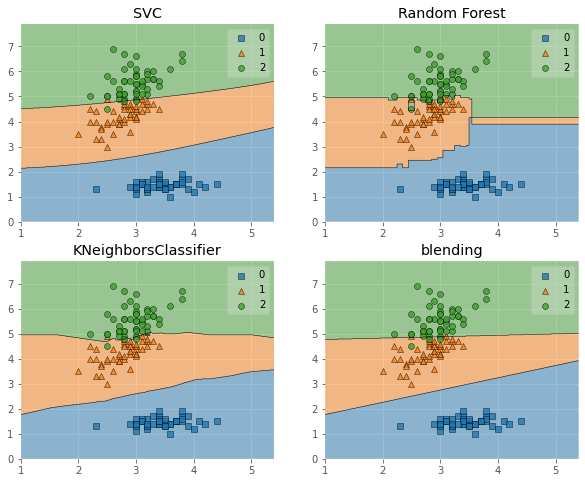

In [7]:
# 我们画出决策边界
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, blending], 
                         ['SVC', 
                          'Random Forest', 
                          'KNeighborsClassifier',
                          'blending'],
                          itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
plt.show()

机器学习在工业中的应用很多，在商品批量生产的时代，需求最广泛的算法应该就是异常检测(anomaly detection)算法了. 异常检测又被称为“离群点检测” (outlier detection)，被广泛引用定义如下 ：

    "An outlier is an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism."

虽然什么样的数据才能算是异常数据还是要看具体场景，但是一般有下面两个特性:

    异常数据跟样本中大多数数据不太一样。异常数据在整体数据样本中占比比较小。

这些特性使得SVM、逻辑回归等分类算法在此情景下都不适用，因为用监督学习算法训练出优秀的模型需要有大量的正向样本，同时也需要有大量的负向样本，并且未来新出现的样本与训练样本数据分布一致。

著名的，人手一本的西瓜书(就是这本)的作者周志华老师提出了孤立森林(Isolation Forest) 算法。

先简单解释一下什么是孤立森林： 「假设我们用一个随机超平面来切割（split）数据空间（data space）, 切一次可以生成两个子空间（想象拿刀切蛋糕一分为二）。

之后我们再继续用一个随机超平面来切割每个子空间，循环下去，直到每子空间里面只有一个数据点为止。

直观上来讲，我们可以发现那些密度很高的簇是可以被切很多次才会停止切割，但是那些密度很低的点很容易很早的就停到一个子空间里了」。

孤立森林算法在大部分工业异常检测场景中，已经被证实是坠吼的（推眼镜）。


既然是森林，那么和随机森林一样，孤立森林由 iTree(isolation tree) 组成，iTree树和随机森林的决策树不太一样，构建过程只是一个完全随机的过程。下面详细解释一下构建过程:
现有数据集中有n条数据，先从这n条数据中抽取一批样本(一般是无放回抽样)，假设样本个数 ψ 。随机选择一个特征作为起始节点，并在该特征的值域里随机选择一个值，对ψ个样本进行二叉划分，将样本中小于该取值的样本划到左分支，样本中大于该取值的划到右分支。然后在左右两个分支重复这样的二叉划分操作。直到达到满足如下条件:

    数据本身不可再分割二叉树达到限定的最大深度

树的最大深度在算法里面已经被限制了，一般只需要达到 $log_2(ψ)$ 深度即可。


下面是简单的可视化。这里假设有4个样本，可以看到 [公式] 最有可能是异常，因为最早它就被孤立了。
![](_images/itree.png)
算法很简单，来看一个更简单的用例， 这里使用了自己生成的数据。skit-learn里也已经集成了iTree:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# 生成训练数据
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 1, X - 3, X - 5, X + 6]

# 生成正常数据
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 1, X - 3, X - 5, X + 6]

# 生成异常数据
X_outliers = rng.uniform(low=-8, high=8, size=(20, 2))

算法主要有两个参数，一个是二叉树的个数，另一个是训练单棵iTree时候抽取样本的数目 [公式] 。

实验表明，当设定参数为 100 棵树，抽样样本数为 256 条时候，在大多数情况下就已经可以取得不错的效果。

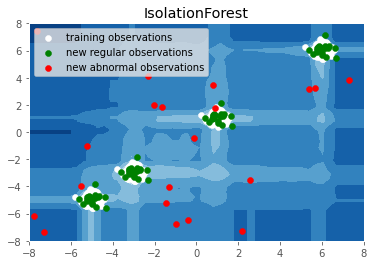

In [9]:
# 使用模型
clf = IsolationForest(max_samples=100*2, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# 作图
xx, yy = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-8, 8))
plt.ylim((-8, 8))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

可以看到红色的点离散在绿色的簇之外，这里被判别为异常的数据。

    如果想要手动实现孤立森林可以参考这个 repo: https://github.com/mgckind/iso_forest有一个兄弟用孤立森林实现了一些Dota比赛的分析: https://towardsdatascience.com/detecting-bot-matches-in-dota-2-using-isolation-forests-a17c34f60923

具体使用还是要大家动手试一试~

事实上最近在做一个图像处理的case中也运用了孤立森林算法，具体代码就不展示了，不过需要注意以下几点：

    训练样本中异常样本的比例比较高，可能最终的效果会受影响.
    异常检测跟具体的应用场景紧密相关，算法检测出的“异常”不一定是我们实际想要的，所以，在特征选择时，要注意过滤不太相关的特征。

个人觉得较好的实践是，在预处理时把不关注的特征normalize。